In [1]:
import numpy as np
from scipy.integrate import dblquad

# N2 = 62
def FVM(N2):
    N = N2 - 2
    h = 1/(N2)
    x1 = np.linspace(0, 1, N2)
    y1 = np.linspace(0, 1, N2)
    x = x1[1:-1]
    y = y1[1:-1]
    x_, y_ = np.meshgrid(x,y)
    
    x_h = np.append(x, 1)
    y_h = np.append(y, 1)

    def f(x, y):
        val = 400 * (x**4 - y**4) * np.sin(20*x*y)
        return val
    def u_y(x):
        return 20 * x * (x**2 - 1)*np.cos(20*x) - 2*np.sin(20*x)
    def u_x(y):
        return 20*y*(1 - y**2)*np.cos(20*y) + 2*np.sin(20*y)
    def u(x, y):
        val = (x**2 - y**2)*np.sin(20*x*y)
        return val
    linear_eq_b = []
    for i in range(0, N):
        for j in range(0, N):
            if i == 0:
                y0 = 0
                y1 = y_h[i]
            if j == 0:
                x0 = 0
                x1 = x_h[j]
            if i>0:
                y0 = y_h[i - 1]
                y1 = y_h[i]
            if j > 0:

                x0 = x_h[j - 1]
                x1 = x_h[j]

            dx = x1 - x0
            dy = y1 - y0
            eqt_vector = np.zeros(N*N)

            k = j + i * N
            eqt_vector[k] = -4
            eqt_b = dblquad(f, y0, y1, x0, x1)[0]
            eqt_b = eqt_b/(dx*dy)

            if (k + 1)/(i + 1) >= N: # x Touch the right boundary
                eqt_vector[k] += 1
                eqt_b += (u_x(y0)/h)
            else:
                eqt_vector[k + 1] = 1
  
            if j > 0: # Not Initial Point
                eqt_vector[k - 1] = 1

            k2 = k - N

            if k2 >= 0: # y Touch the left boundary, which means  y = 0
                eqt_vector[k2] = 1

            k3 = k + N

            if k3 / N >= N: # y Touch the right boundary, y = 1
                eqt_vector[k] += 1
                eqt_b += u_y(x0)/h

            elif k3 / N < N:
                eqt_vector[k3] = 1

            linear_eq_b.append(eqt_b)
            eqt_vector = eqt_vector.reshape(1,-1)
            if j == 0:
                eqt_row_vec = eqt_vector
            else:
                eqt_row_vec = np.concatenate((eqt_row_vec, eqt_vector), axis = 0)

        if i == 0:
            eqt_coef_matrix = eqt_row_vec
        else:
            eqt_coef_matrix = np.concatenate((eqt_coef_matrix,eqt_row_vec), axis = 0)

    coef_mat = -eqt_coef_matrix/(h**2)
    b = np.array([linear_eq_b]).reshape(-1,1)
    numeric_solu = np.linalg.solve(coef_mat, b.flatten())
    exact_solu = u(x_, y_)
    return numeric_solu, exact_solu
numeric_solu, exact_solu = FVM(52)

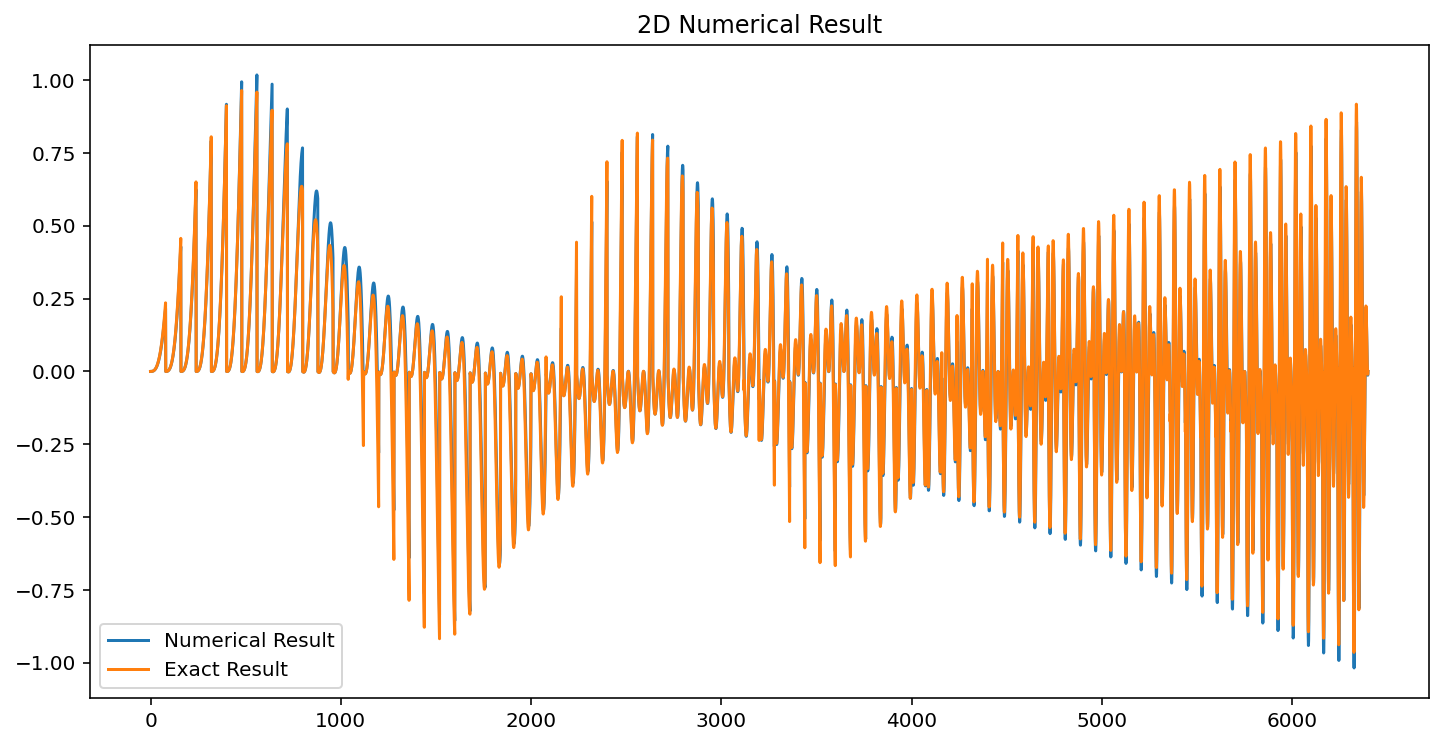

In [4]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(numeric_solu.flatten(), label = 'Numerical Result')
plt.plot(exact_solu.flatten(), label = 'Exact Result')
plt.legend(loc = 0)
plt.title('2D Numerical Result')
plt.show()

In [2]:
N_list = np.arange(7, 87, 5)
def mse(x,y):
    l = len(x)
    mseval = np.sum((x-y)**2)/l
    return mseval
mse_val = []
for N2 in N_list:
    numeric_solu, exact_solu = FVM(N2)
    val = mse(numeric_solu.flatten(), exact_solu.flatten())
    mse_val.append(val)

Text(0.5, 0, 'Interval Split Number')

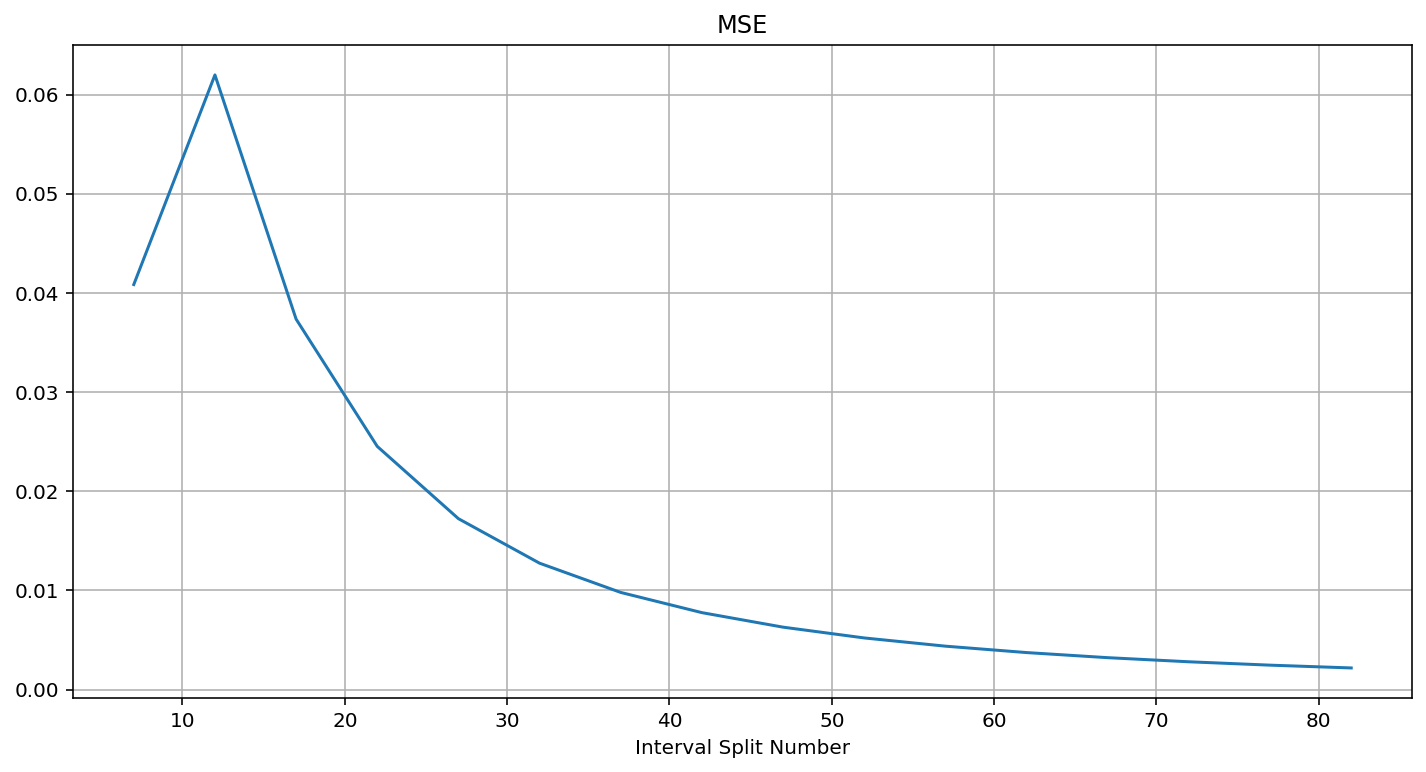

In [3]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(N_list,mse_val)
plt.title('MSE')
plt.grid('True')
plt.xlabel('Interval Split Number')

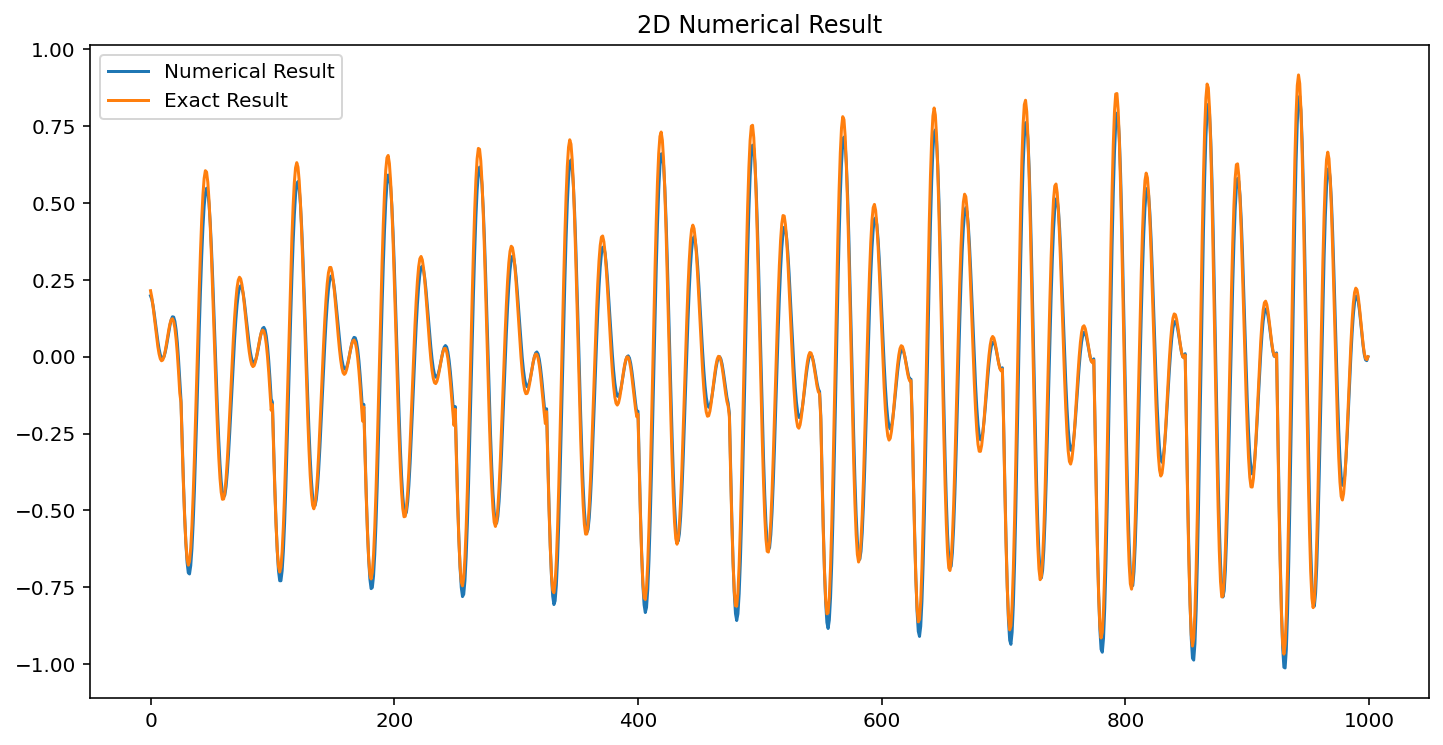

In [335]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(numeric_solu.flatten()[-1000:], label = 'Numerical Result')
plt.plot(exact_solu.flatten()[-1000:], label = 'Exact Result')
plt.legend(loc = 0)
plt.title('2D Numerical Result')
plt.show()

In [9]:
numeric_solu.shape

(6400,)

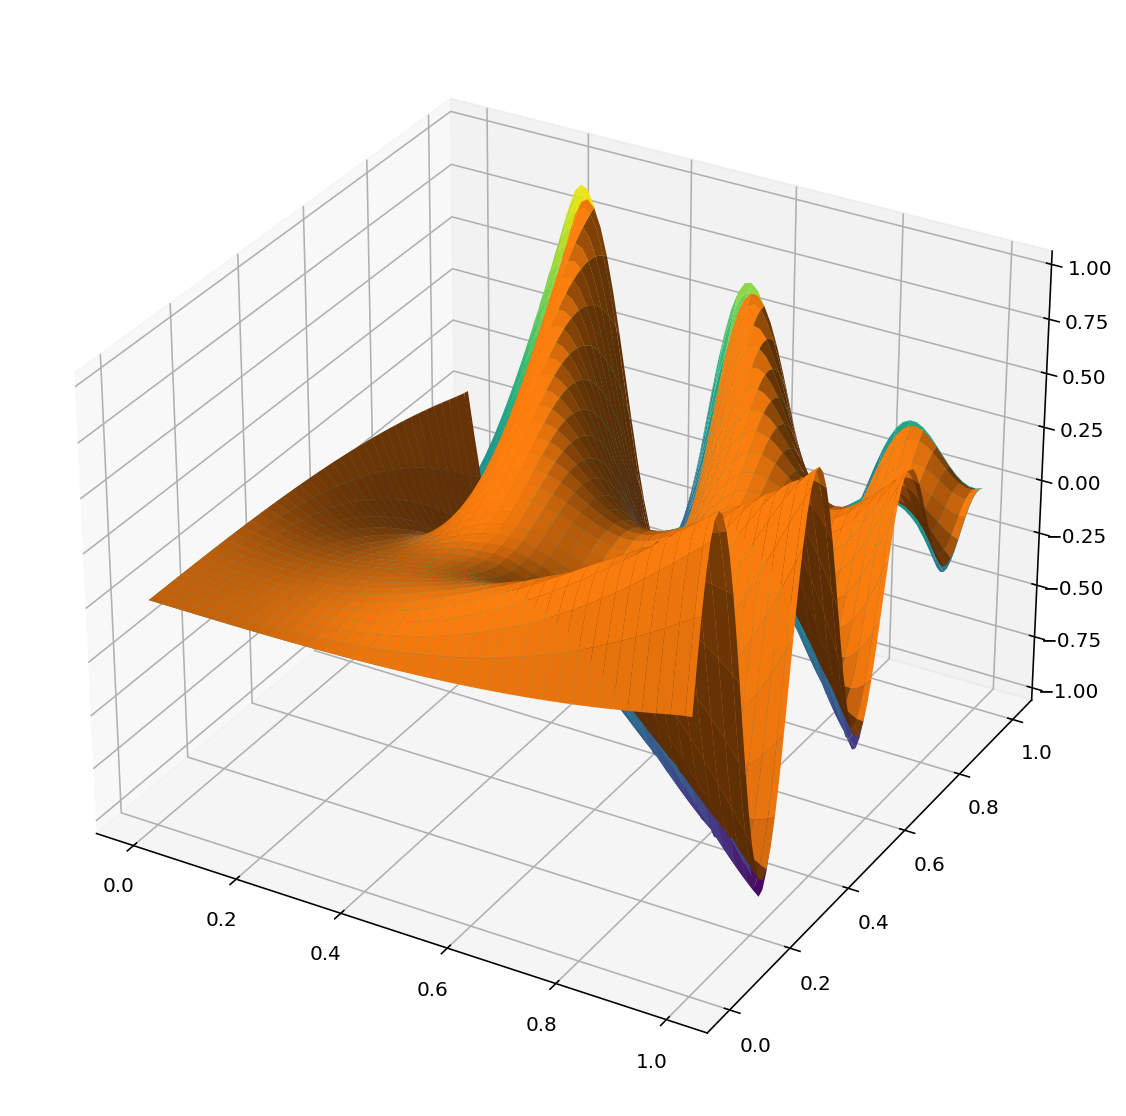

In [10]:
N = 80

h = 1/(N - 2)
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
x_, y_ = np.meshgrid(x,y)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_, y_, exact_solu, cmap='viridis')
ax.plot_surface(x_, y_, numeric_solu.reshape(N,N))